# Exercise 3 Neural Network

In this part of the exercise, you will implement a neural network to recognize handwritten digits using the same training set as before. The neural network will be able to represent complex models that form non-linear hypotheses. For this week, you will be using parameters from a neural network that we have already trained

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from pandas import DataFrame as dframe

In [3]:
# =========== Part 1: Loading and Visualizing Data =============
data = sio.loadmat('ex3data1.mat')
weight = sio.loadmat('ex3weights.mat')

In [4]:
data.keys(), weight.keys()

(dict_keys(['__header__', '__version__', '__globals__', 'X', 'y']),
 dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2']))

In [5]:
# Storing training data to X and y
X = data['X']
y = data['y']
m = len(X)

In [6]:
# As usual add bias term
X = np.insert(X, 0, 1, axis=1)

In [7]:
X.shape, y.shape

((5000, 401), (5000, 1))

## Model representation

![nn_model](./img/nn_model.png)

In [11]:
#  ================ Part 2: Loading Pameters ================
# In this part of the exercise, we load some pre-initialized neural network parameters.
theta1 = weight['Theta1']
theta2 = weight['Theta2']

In [12]:
theta1.shape, theta2.shape

((25, 401), (10, 26))

In [13]:
def sigmoid(z):
    sig = 1/(1+np.exp(-z))
    return sig

## Feedforward Propagation and Prediction
You should implement the feedforward computation that computes $h_\theta(x^{(i)})$ for every example i and returns the associated predictions. Similar to the one-vs-all classification strategy, the prediction from the neural network will
be the label that has the largest output $(h_\theta(x))_k$

In [14]:
# ================= Part 3: Implement Predict =================
def predict(theta1, theta2, X):
    '''
    predict will return the neural network's prediction.
    Note that the argument passed as X should already has bias term
    theta1 and theta2 corresponds to parameters for second/hiden layer and third/output layer
    '''
    # Necessary variable
    m = X.shape[0]
    
    # 1st -> 2nd layer
    # input to hidden layer
    z2 = X@theta1.T # 5000 x 401 @ 401 x 25, where p is input to second layer (hidden layer)
    z2 = sigmoid(z2) # 5000 x 25
    
    
    # Add bias term to z2
    z2 = np.insert(z2, 0, 1, axis=1) # 5000 x 26
    
    # 2nd -> 3rd layer
    # hidden to output layer
    z3 = z2@theta2.T # 5000 x 26 @ 26 x 10
    z3 = sigmoid(z3)
    
    pred = np.argmax(z3, axis=1)
    pred = pred+1    
    
    return pred

In [15]:
pred = predict(theta1, theta2, X)

In [16]:
dframe(pred)

,0
0,10
1,10
2,10
3,10
4,10
...,...
4995,9
4996,9
4997,9
4998,9


In [17]:
acc = np.sum((pred==y.flatten())*1/len(pred))*100

In [18]:
print('Training Set Accuracy', acc)

Training Set Accuracy 97.52000000000001


In [19]:
def displayImage(X):
    '''
    Note that the argument passed as X should already has bias term, shape: 5000 x 401
    '''
    (m, n) = X.shape
    
    rp = np.random.randint(m)
    
    Xdraw = X[rp]
    Xdraw = Xdraw[np.newaxis, :]
    
    pred = int(predict(theta1, theta2, Xdraw))
    
    if pred == 10:
        pred = 0
    
    # ========= Drawing image ================
    # Bias term is remove when drawing an image
    if (Xdraw[:, 0].all()):
        Xdraw = np.delete(Xdraw, 0, axis=1) 
        
    # Drawing an image
    width = int(np.sqrt(n))
    height = int(n/width)
    
    # Pic
    pic = Xdraw.reshape(width, height, order='F')
    
    plt.figure(figsize=(7, 5))
    plt.title('Neural Network Predicted as: %i' %pred)
    plt.imshow(pic, cmap='gray', interpolation='none')
    plt.axis('off')
    plt.show()
    
    return pred

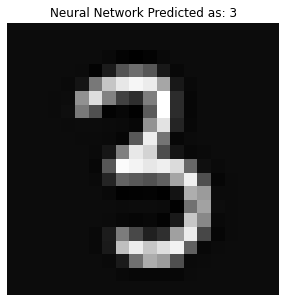

In [20]:
p = displayImage(X)